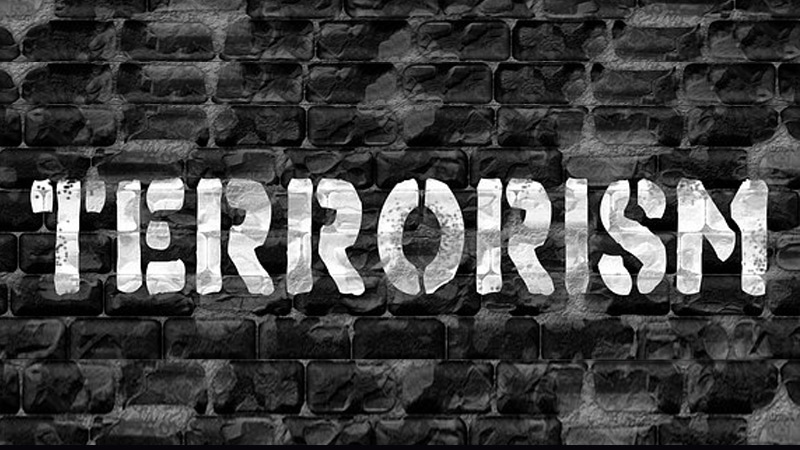

# Importing the libraries and data



In [ ]:
#basic imports
import numpy as np
import pandas as pd
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected = True)
import io
import base64
import codecs
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML, display
# Data Visualization Liraries
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display, Markdown

In [ ]:
!apt-get install -q libgeos-3.5.0

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'


In [ ]:
!apt-get install -q libgeos-dev

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

     - 133.1 MB 3.5 MB/s
     |████████████████████████████████| 6.3 MB 2.1 MB/s 
     |████████████████████████████████| 219 kB 57.3 MB/s 


In [ ]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8 MB 2.1 MB/s 


In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Feature Engineering : Creating new features from the existing features.

In [ ]:
#Keep 20 columns
df = data[['eventid', 'iyear','country_txt', 'region_txt', 'latitude', 'longitude', 'provstate', 'city', 'crit1', 'crit2', 'crit3', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt','gname', 'guncertain1', 'claimed', 'weaptype1_txt', 'nkill','nwound']]
#Renaming for further use
df.rename(columns = {'eventid' : 'EventId', 'iyear' : 'Year','country_txt' : 'Country', 'region_txt' : 'Region', 'provstate' : 'Provstate', 'city' : 'City', 'crit1' : 'Crit1', 'crit2' : 'Crit2', 'crit3' : 'Crit3', 'success' : 'Success', 'suicide' : 'Suicide', 'attacktype1_txt' : 'AttackType', 'targtype1_txt' : 'TargType', 'targsubtype1_txt' : 'TargSubType', 'natlty1_txt' : 'Nationality', 'gname' : 'Group', 'guncertain1' : 'GunCertain1', 'claimed' : 'Claimed', 'weaptype1_txt' : 'WeaponType', 'nkill' : 'Killed','nwound' : 'Wounded'}, inplace = True)

In [ ]:
# Creating new feature "Casualities" by adding "Killed" and "Wounded" features
df['Casualities'] = df['Killed'] + df['Wounded']
#Merging all Hostage Taking Types into single category
df['AttackType'] = df['AttackType'].replace('Hostage Taking .*','Hostage Taking', regex=True)

# Visualizing the Data

**Plotting the global terrorist activites trend on a time scale :**

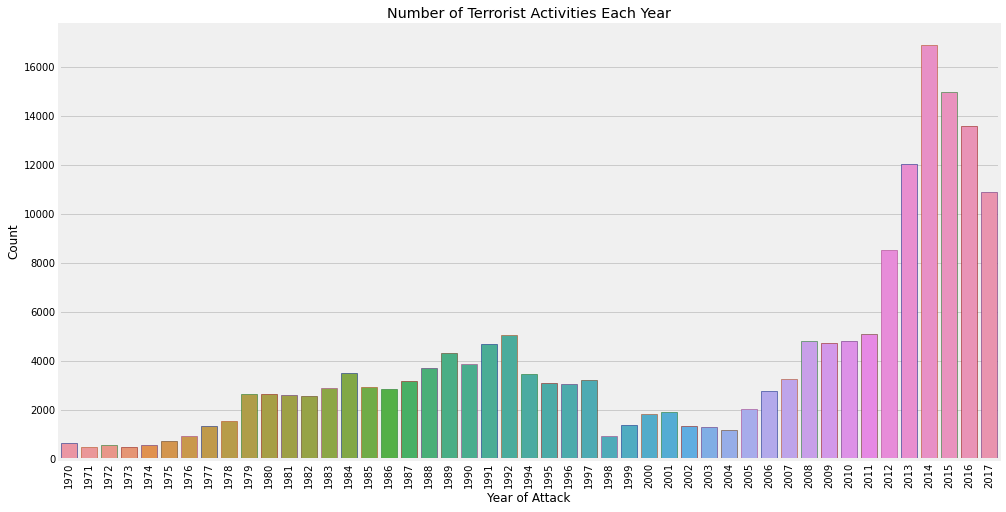

In [ ]:
#@title
plt.subplots(figsize = (15, 8))
sns.countplot('Year', data = df, edgecolor = sns.color_palette('dark', 7))
plt.xticks(rotation = 90)
plt.xlabel("Year of Attack")
plt.ylabel("Count")
plt.title("Number of Terrorist Activities Each Year")
plt.show()

From the above graph, its very clear that the global terrorist activities hit a lowest point at the end of 19th century. But all of a sudden, it hiked to a wooping 18,000 mark in 2014.

why terrorism raised after 2000?

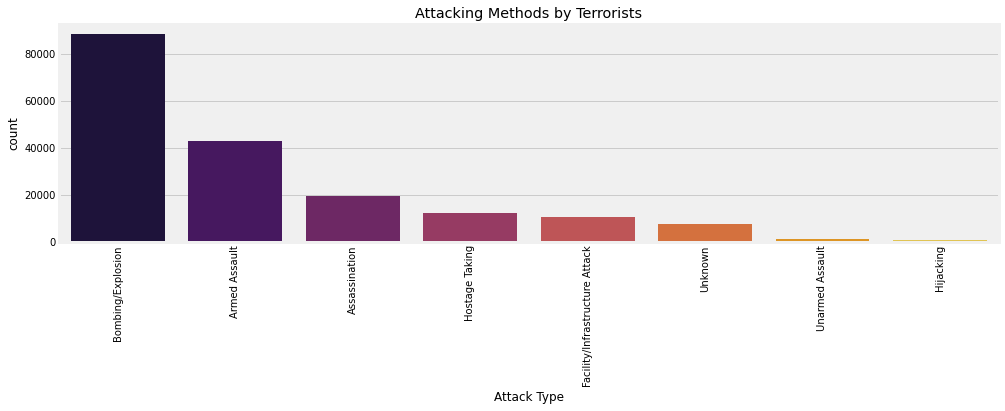

In [ ]:
#@title
plt.subplots(figsize = (15, 4))
sns.countplot('AttackType', data = df, palette = 'inferno', order = df['AttackType'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

In [ ]:
#@title
# Create table_1 about Attack types and number of Dead/Injured People​
cat = ['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking', 'Facility/Infrastructure Attack']
color_cat = sns.color_palette("Set2", 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))
table_1 = df[['AttackType','Casualities']].groupby('AttackType', as_index = False).sum().sort_values(by = 'Casualities', ascending = False)
table_1 = table_1.reset_index()
inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)
table_1["Casuality_Rate"] = table_1["Casualities"]/table_1["Incidents"]

**Casualities = Killed + Wounded**

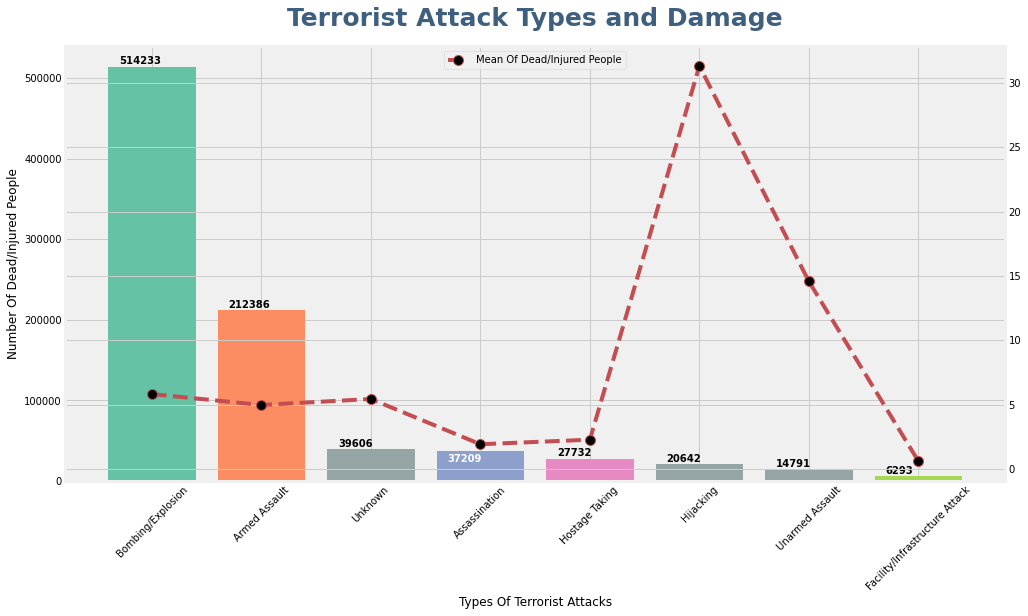

In [ ]:
#@title
# Draw chart of Terrorist Attack Types and the Damage
labels = table_1['AttackType'].tolist()
x = np.arange(len(labels)) 
cas = table_1['Casualities'].tolist()

gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]

c_rate = table_1["Casuality_Rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(labels, cas,
       color = color_list,
       align = 'center')

# Number in bar chart
for i,v in enumerate(cas):
    ax1.text(i - 0.3, v - 13000 if v == 37209 else v + 3000, str(round(v)), 
             color = 'w' if v == 37209 else 'k',
             fontweight = 'bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(labels, c_rate, linestyle = '--', linewidth = 4, marker = 'o', 
         markerfacecolor = 'black', markersize = 10,
         label = 'Mean Of Dead/Injured People',
         color = '#C44D51')

plt.title('Terrorist Attack Types and Damage', fontsize = 25, pad = 20, weight = 'bold', 
             color = sns.cubehelix_palette(8, start = .5, rot = -.75)[-3]) 

ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(labels, rotation = 45)

plt.yticks(fontsize = 10)

ax2.legend(loc = 'upper center') 
fig.show()

From this, we can say that even though the frequency of "Hijacking" less compared to others, but the Casuality Rate is way to high w.r.t the trend for other terrorist activities.

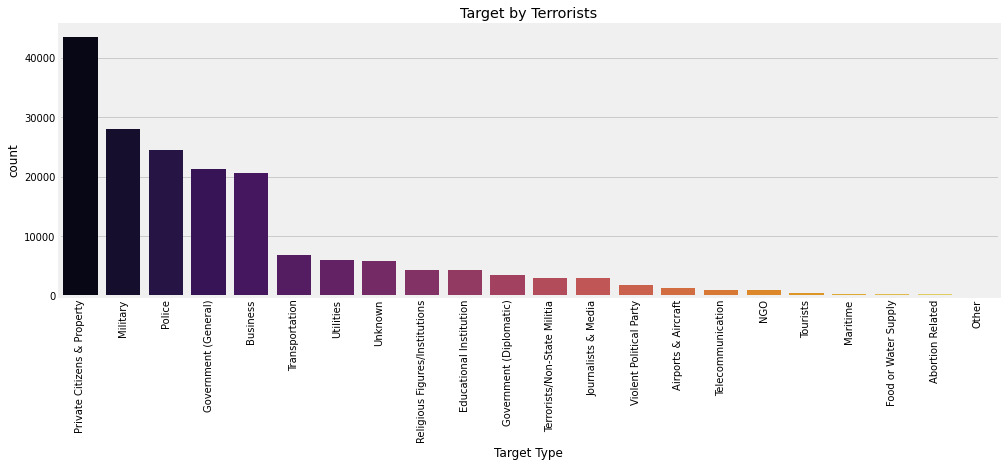

In [ ]:
#@title
plt.subplots(figsize = (15,5))
sns.countplot('TargType',data = df, palette = 'inferno', order = df['TargType'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

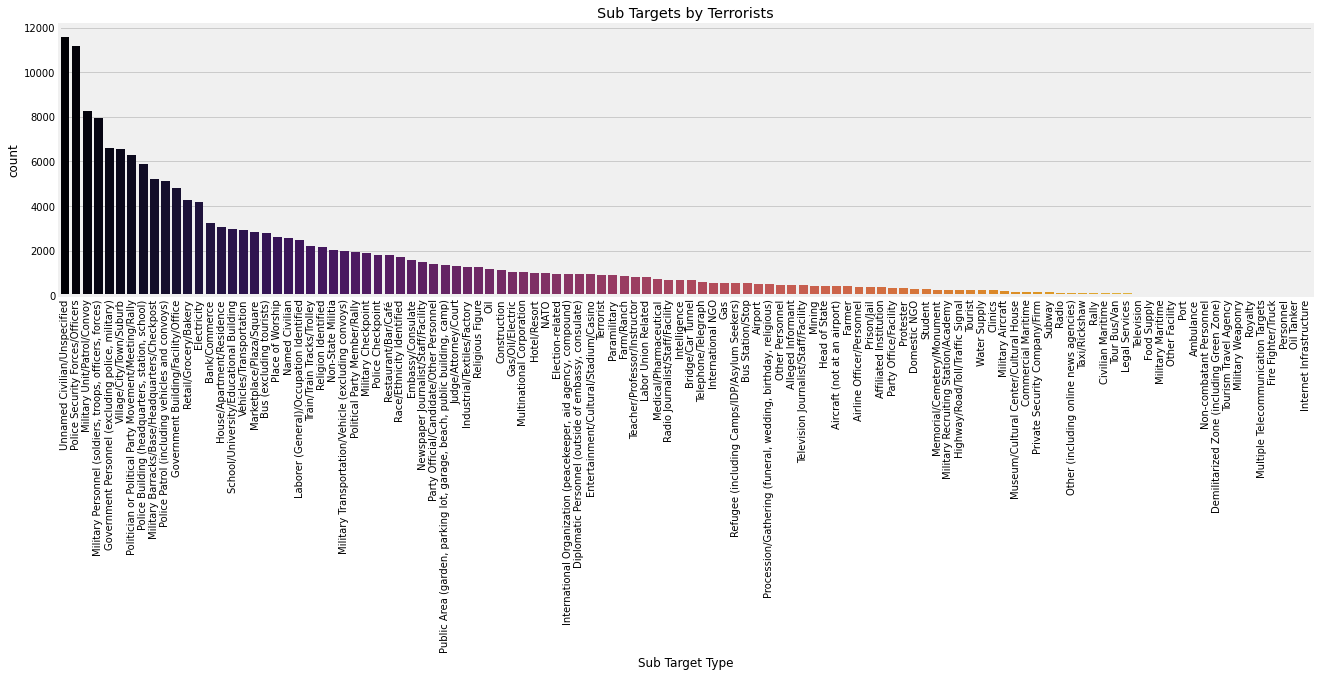

In [ ]:
#@title
plt.subplots(figsize = (20,5))
sns.countplot('TargSubType', data = df, palette = 'inferno', order = df['TargSubType'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Sub Target Type')
plt.title('Sub Targets by Terrorists')
plt.show()

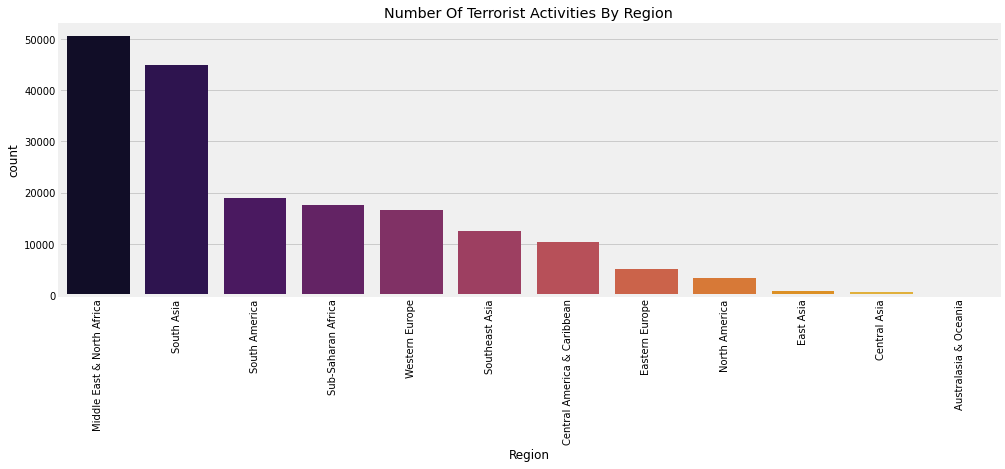

In [ ]:
#@title
plt.subplots(figsize = (15,5))
sns.countplot('Region', data = df, palette = 'inferno', order = df['Region'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

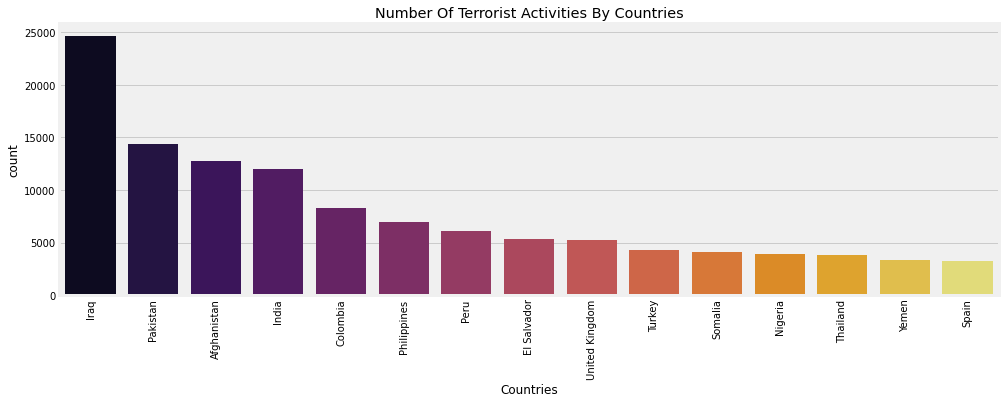

In [ ]:
#@title
plt.subplots(figsize = (15,5))
sns.countplot('Country', data = df, palette = 'inferno', order = df['Country'].value_counts()[:15].index)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.title('Number Of Terrorist Activities By Countries')
plt.show()

After analyzing the data We found out **Middle East Countries** like Iran, Iraq, Afghanistan and **South Asia Countries** like Pakistan , India are Facing too much terrorism.


In [ ]:
#@title
df['casualities'] = df['Killed'] + df['Wounded']

Iraq , Afghanistan , Pakistan is the top three countries in which Most of the peoples have been killed due to terrorism.

 **These are top 3 cities** 

*   Baghdad is the city of Iran
*   Mosul is also the city of Iran


*   Mogadishu is the city of Somalia





1.   The group that is carrying out the most terrorism in Somalia is AL- Shabaab and Mujahideen Youth Movement (MYM) Group.
2.   he group that is carrying out the most terrorism in Iran is Mujahedin-e Khalq (MEK) and Arab Separatists Group.

Text(0.5, 1.0, 'Terroist attacks with lesser than 100 casualities')

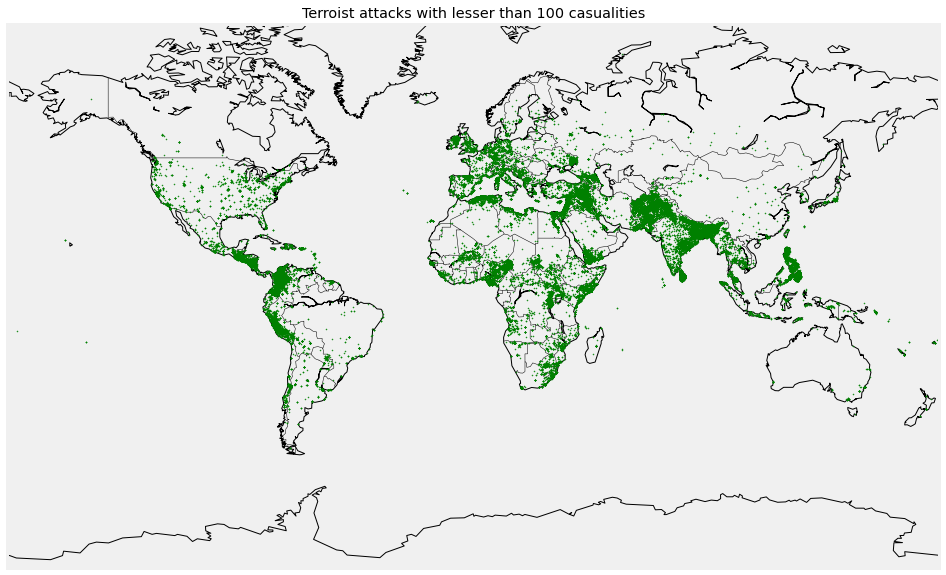

In [ ]:
#@title
m1 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
lat_100 = list(df[df['casualities'] < 100].latitude)
long_100 = list(df[df['casualities'] < 100].longitude)
x_100,y_100 = m1(long_100, lat_100)
m1.drawcoastlines()
m1.drawcountries()
m1.plot(x_100, y_100, 'go', markersize = 0.5, color = 'g')
fig=plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Terroist attacks with lesser than 100 casualities")

From the above map, **India, Middle east and European countries** are the favorite targets of the terrorist groups.

Text(0.5, 1.0, 'Terroist attacks with more than 100 Casualities')

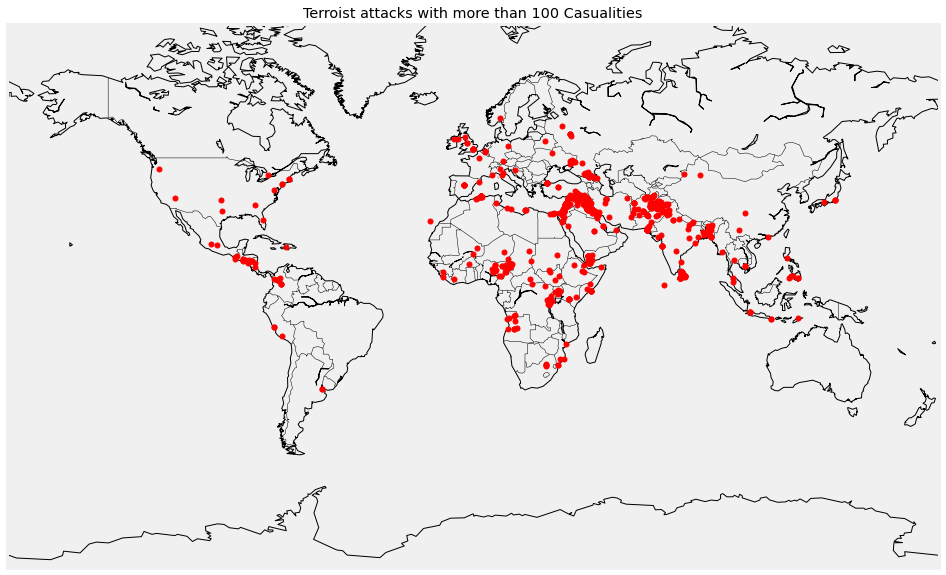

In [ ]:
#@title
m2 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
lat_100 = list(df[df['casualities'] >= 100].latitude)
long_100 = list(df[df['casualities'] >= 100].longitude)
x_100,y_100 = m2(long_100, lat_100)
m2.drawcoastlines()
m2.drawcountries()
m2.plot(x_100, y_100, 'go', markersize = 5, color = 'r')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Terroist attacks with more than 100 Casualities")

Most of the major attacks were also happened in **Middle east** and contries like **Pakistan, Afganisthan** etc.

***Which regions are facing more terrorist attacks worldwide? ***

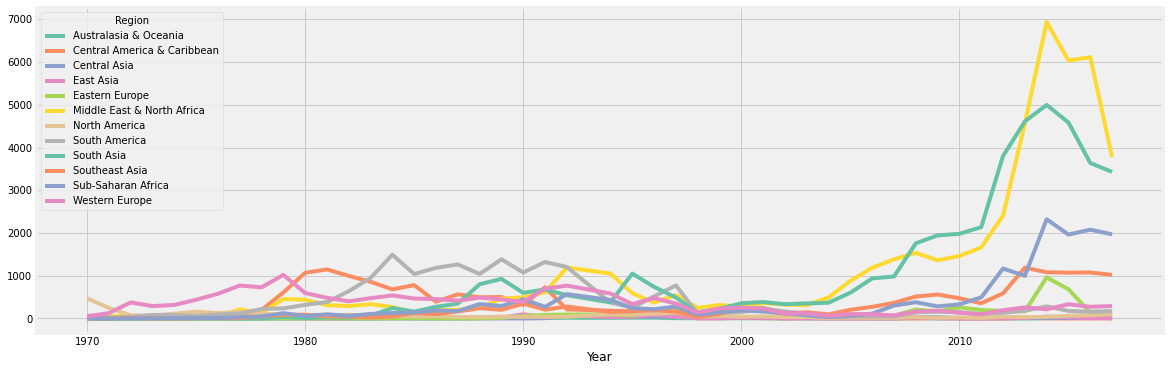

In [ ]:
#@title
df_region = pd.crosstab(df.Year,df.Region)
df_region.plot(color = sns.color_palette('Set2', 12))
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.show()

Middle East, North Africa, South Asia are the top most affected regions by terrorism. In this chart also we can see a complete drop in the global terrorism rate at the end of 19th century.

But after that, there was a sudden hike in the terrorism worldwide. So its very clear that something that happened around this time led to this hike. What was that ?

9/11 attack ?

Lets analyse which type of attack is famous in every region :

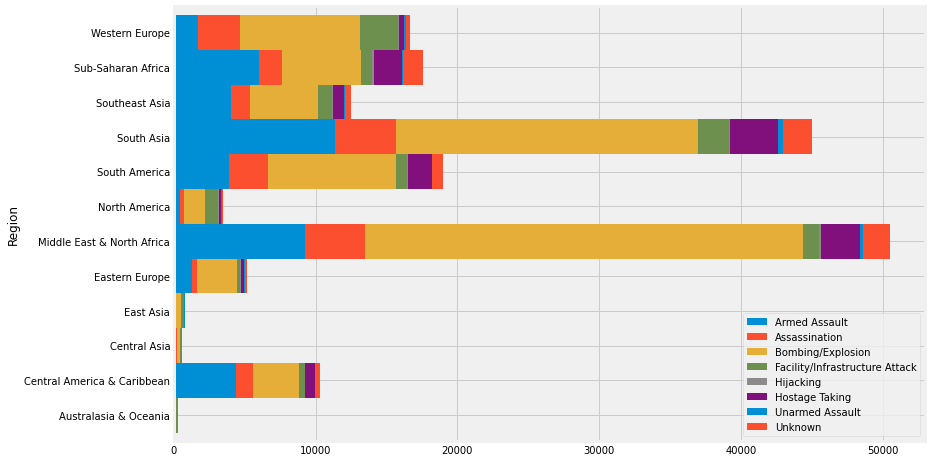

In [ ]:
#@title
df_type = pd.crosstab(df.Region,df.AttackType)
df_type.plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(12 ,8)
plt.legend(loc = 4)
plt.show()

Frrom the chart above, it is clear that bombing and explosion is the favourite attack of terrorist groups in every region.

This may be the reason why most number of civilians are killed in the attacks as a single explosion claims lots of lives.

What are the top most affected countries from terrorism worl wide :

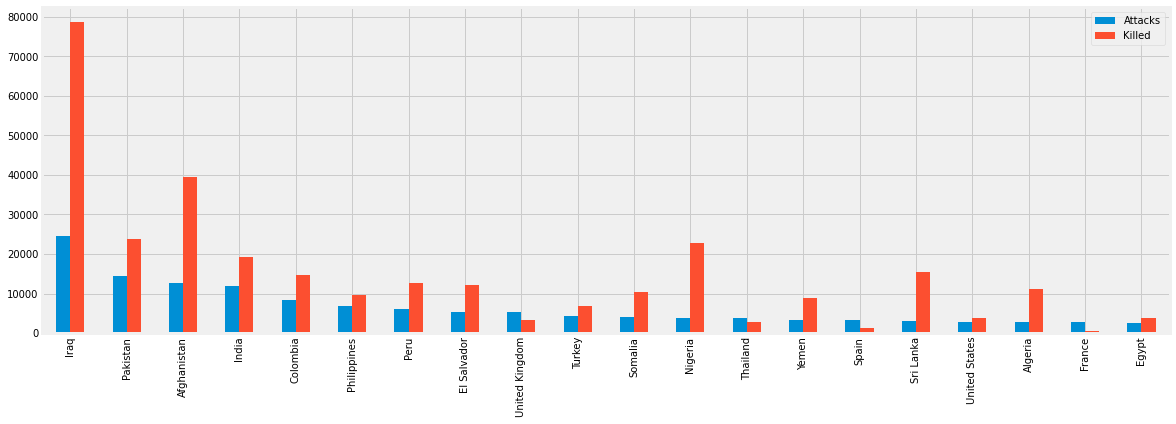

In [ ]:
#@title
# Top 20 countries affected by terrorism
count_df=df['Country'].value_counts()[:20].to_frame() # to_frame() function will generate a dataframe out of the results. 
count_df.columns=['Attacks']

# This will give the number of people killed in every country collectively
count_kill=df.groupby('Country')['Killed'].sum().to_frame() 
count_kill.head ()

# This will merge the count_df and count_kill datasets 
# and give top 20 countries with no of attacks and no of people killed 
attack_kill = count_df.merge(count_kill, left_index = True, right_index = True, how = 'left')
attack_kill

# Plotting the same on a bar chart
attack_kill.plot.bar()
fig = plt.gcf()
fig.set_size_inches(18, 6)

From the above chart, we can come to some obvious conclusions :

In some of the Middle east contries like Iraq, number of casualities is more than twice the number of attacks. 

**Reasons**



*   High density of population 
*   Poor prevention and security


 
In developed contries like UK, Spain, France, no of attacks is more than the number of casulaities. 

**Reasons**

*   Low density of population 
*   Better prevention and security


Which terror groups are highly active?

Text(0.5, 1.0, 'Most active terrorist groups')

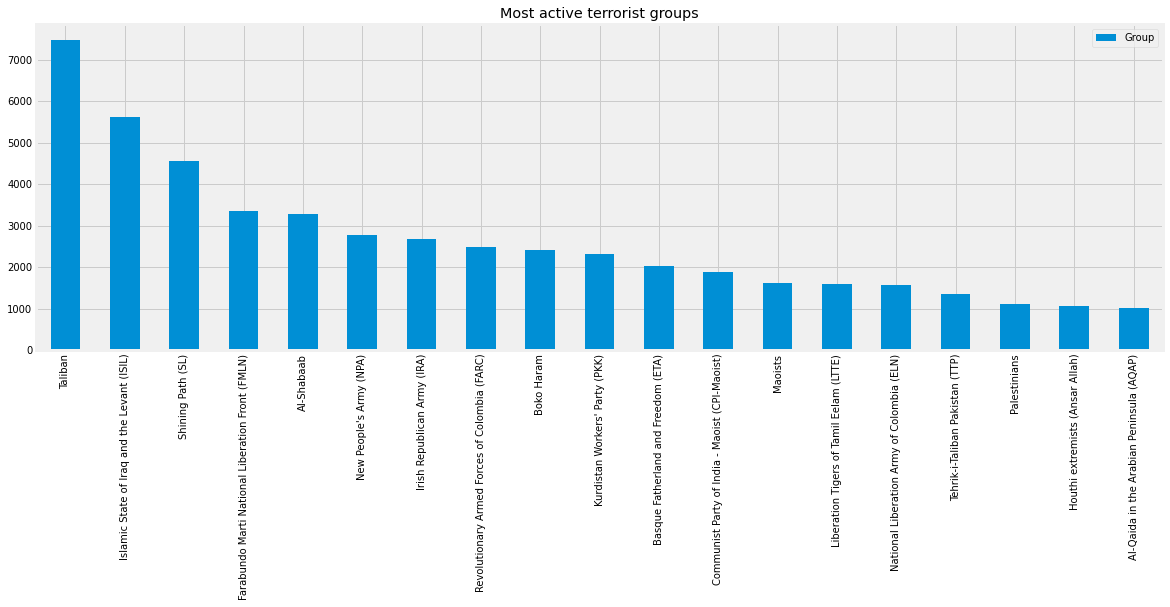

In [ ]:
#@title
# To find which terrorist group is most active
count_group = df['Group'].value_counts()[:20].to_frame()
count_group[1:20].plot.bar()
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.title("Most active terrorist groups")

Terrorist groups like taliban , Islamic State of Iraq and the Levant (ISIL) , Shining Path (SL) , New People's Army (NPA) , Al-Shabaab doing too much terrorism.

Plotting th activities of top 10 groups in a time series plot :

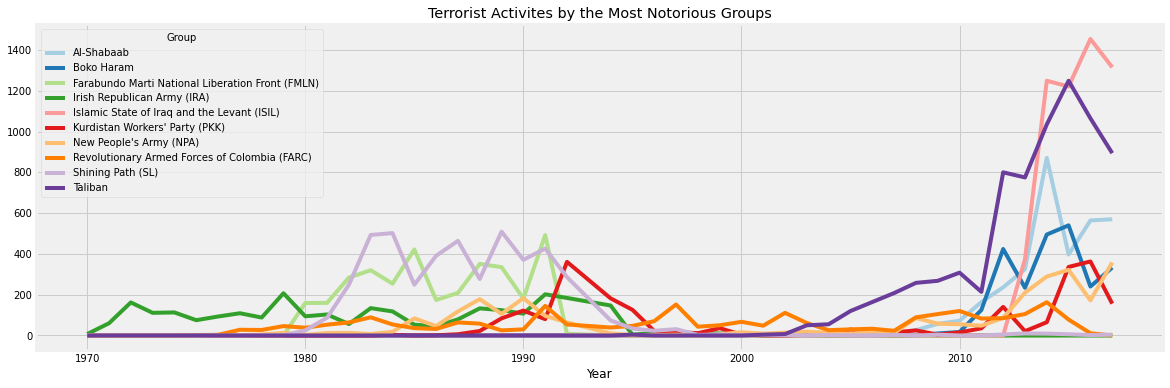

In [ ]:
#@title
top_groups10 = df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
noto_grp = pd.crosstab(top_groups10.Year, top_groups10.Group)
noto_grp.plot(color = sns.color_palette('Paired', 10))
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.title("Terrorist Activites by the Most Notorious Groups")
plt.show()

The above chart clearly shows that all the terror groups are active for some particular time and stopped their activities after some time before 2000. But after 2000, we can see lot of groups emerging.

We can ask questions like what happened after the year 2000 ? What is the moto for these groups ? Is somebody creating these groups and funding them for their own goodwill ?

This is because
Most notorious groups like Taliban, ISIS emerged after 2000.

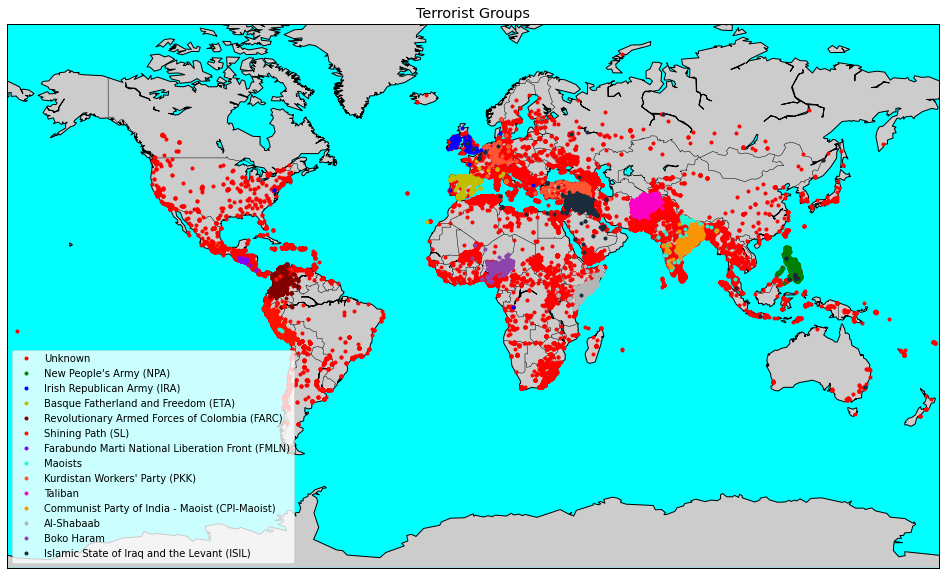

In [ ]:
#@title
groups = df[df['Group'].isin(df['Group'].value_counts()[:14].index)]
m3 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, lat_ts = 20, resolution = 'c', lat_0 = True, lat_1 = True)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color =  'aqua')
m3.drawmapboundary(fill_color = 'aqua')
fig = plt.gcf()
fig.set_size_inches(22, 10)
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']
group = list(groups['Group'].unique())
def group_point(group, color, label):
    lat_group = list(groups[groups['Group'] == group].latitude)
    long_group = list(groups[groups['Group'] == group].longitude)
    x_group, y_group = m3(long_group, lat_group)
    m3.plot(x_group,y_group, 'go', markersize = 3, color = j, label = i)
for i,j in zip(group,colors):
    group_point(i, j, i)
legend = plt.legend(loc = 'lower left', frameon = True, prop = {'size' : 10})
frame = legend.get_frame()
frame.set_facecolor('white')
plt.title('Terrorist Groups')
plt.show()

The Taliban carried out more terrorism than any other terrorist group

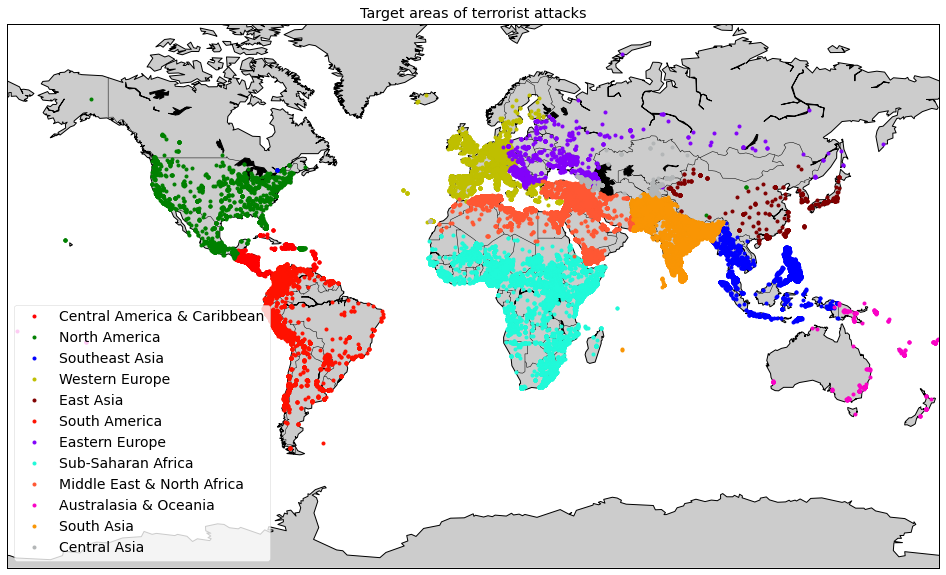

In [ ]:
#@title
groups = df[df['Region'].isin(df['Region'].value_counts()[:14].index)]
m4 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, lat_ts = 20, resolution = 'c', lat_0 = True, lat_1 = True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color = 'black')
m4.drawmapboundary(fill_color = 'white')
fig = plt.gcf()
fig.set_size_inches(22, 10)
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']
group = list(groups['Region'].unique())
def group_point(group, color, label):
    lat_group = list(groups[groups['Region'] == group].latitude)
    long_group = list(groups[groups['Region'] == group].longitude)
    x_group, y_group =  m4(long_group,lat_group)
    m4.plot(x_group, y_group, 'go', markersize = 3, color = j, label = i)
for i,j in zip(group, colors):
    group_point(i, j, i)
legend = plt.legend(loc = 'lower left', frameon = True, prop = {'size' : 14})
frame = legend.get_frame()
frame.set_facecolor('white')
plt.title('Target areas of terrorist attacks')
plt.show()

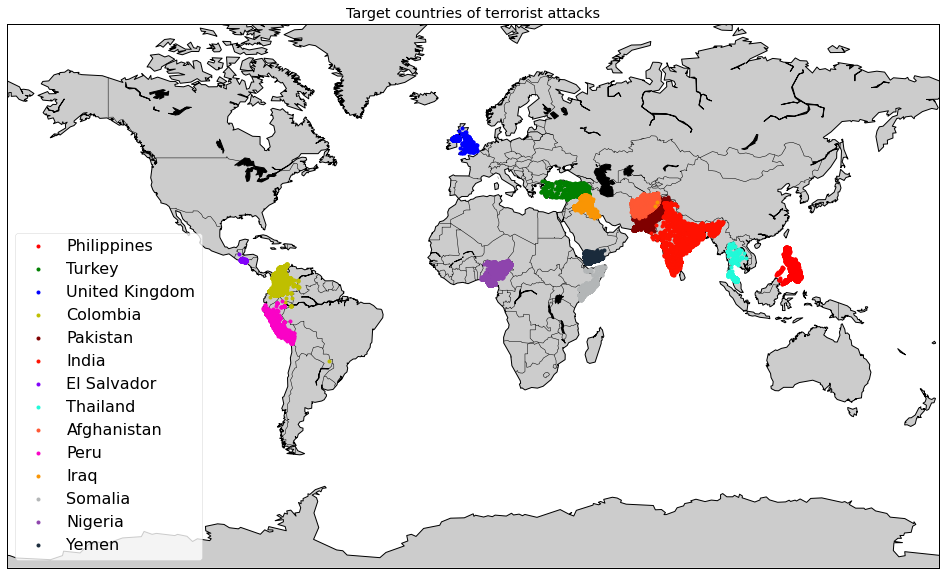

In [ ]:
#@title
groups = df[df['Country'].isin(df['Country'].value_counts()[:14].index)]
m5 = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, lat_ts = 20, resolution = 'c', lat_0 =  True, lat_1 = True)
m5.drawcoastlines()
m5.drawcountries()
m5.fillcontinents(lake_color = 'black')
m5.drawmapboundary(fill_color = 'white')
fig = plt.gcf()
fig.set_size_inches(22, 10)
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']
group = list(groups['Country'].unique())
def group_point(group, color, label):
    lat_group = list(groups[groups['Country'] == group].latitude)
    long_group = list(groups[groups['Country'] == group].longitude)
    x_group, y_group = m5(long_group, lat_group)
    m5.plot(x_group, y_group, 'go', markersize = 3, color = j, label = i)
for i,j in zip(group, colors):
    group_point(i, j, i)
legend = plt.legend(loc = 'lower left', frameon = True, prop = {'size' : 16})
frame = legend.get_frame()
frame.set_facecolor('white')
plt.title('Target countries of terrorist attacks')
plt.show()

In [ ]:
#@title
tlb_act = df[df["Group"]=="Taliban"]["Country"].value_counts()
tlb_act

Afghanistan     7423
Pakistan          54
Turkmenistan       1
Name: Country, dtype: int64

Mostly terrorist activites of taliban group are in above countries.


# Lets plot the terrorist activities in India :

[]

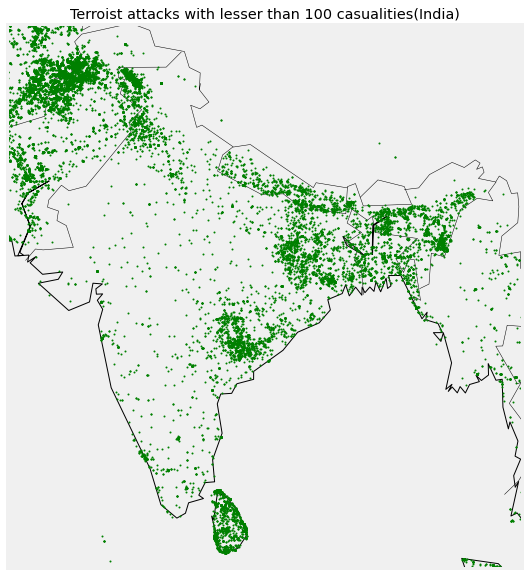

In [ ]:
#@title
df_india = df[df['Country'] == 'India']
mi1 = Basemap(projection = 'mill', llcrnrlat = 5, urcrnrlat = 37, llcrnrlon = 67, urcrnrlon = 99)
lat_100 = list(df[df['casualities'] < 100].latitude)
long_100 = list(df[df['casualities'] < 100].longitude)
x_100, y_100 = mi1(long_100, lat_100)
mi1.drawcoastlines()
mi1.drawcountries()
mi1.plot(x_100, y_100, 'go', markersize = 1, color = 'g')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Terroist attacks with lesser than 100 casualities(India)")
plt.plot()

It is clear from the above map that states like **Andhra, Bihar, Orissa and J&K** are the most affected states from terrorism. Presence of **Naxals** is one of the main reason for this.

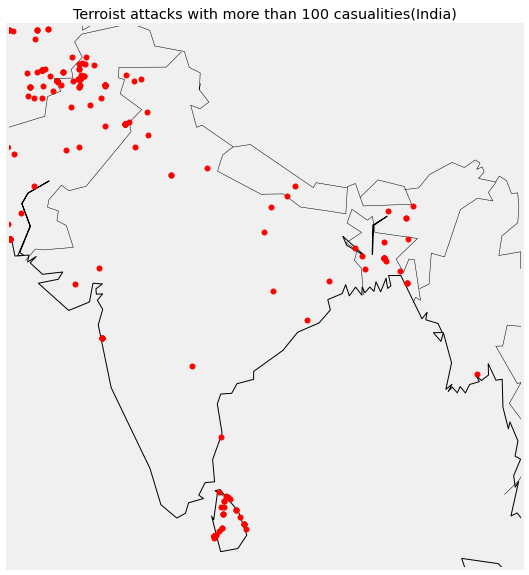

In [ ]:
#@title
mi2 = Basemap(projection = 'mill', llcrnrlat = 5, urcrnrlat = 37, llcrnrlon = 67, urcrnrlon = 99)
lat_100 = list(df[df['casualities'] >= 100].latitude)
long_100 = list(df[df['casualities'] >= 100].longitude)
x_100, y_100 = mi2(long_100, lat_100)
mi2.drawcoastlines()
mi2.drawcountries()
mi2.plot(x_100, y_100, 'go', markersize = 5, color = 'r')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Terroist attacks with more than 100 casualities(India)")
plt.show()

The worst attack till date in India is the Mumbai Attack in 2006, which killed more than 200 people.

**Most active terrorist groups in India**

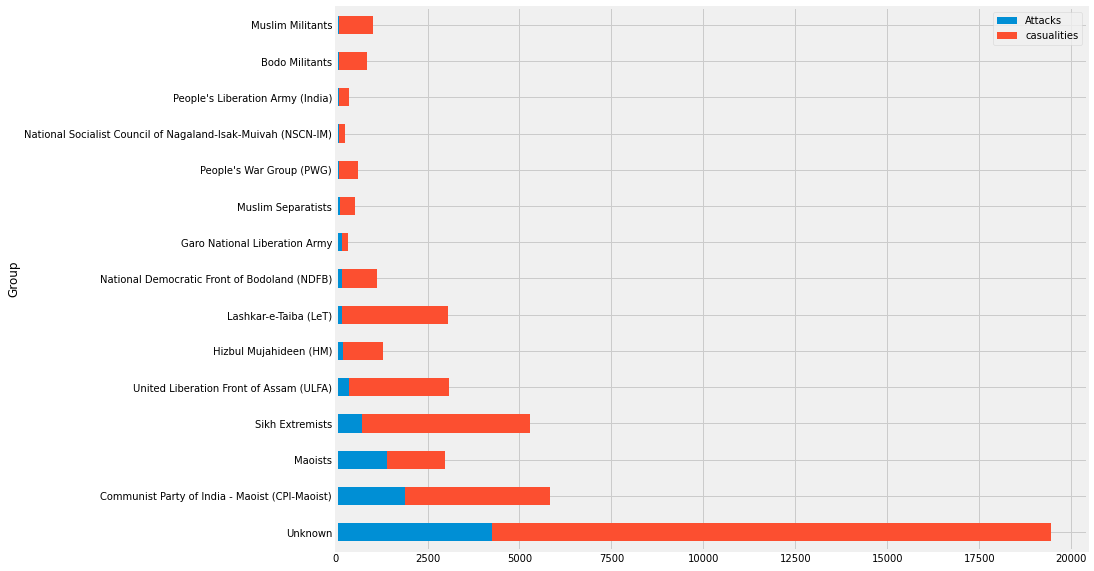

In [ ]:
#@title
df_india[df_india['Group'].isin(df_india['Group'].value_counts()[0:15].index)][['casualities','Group']].groupby('Group').sum().reset_index().merge(df_india[df_india['Group'].isin(df_india['Group'].value_counts()[0:15].index)]['Group'].value_counts().to_frame().reset_index().rename(columns={'index':'Group','Group':'Attacks'}), on='Group').sort_values(by='Attacks',ascending=False).plot.barh(x='Group',y=['Attacks','casualities'],figsize=(12,10),stacked=True)



*   CPI Maoist was the most active group in India.
*   LeT has caused greater no. of casualties in less no. of attacks.
*   Here Unknown refers mostly to the terrorists which cross border from Pakistan to Jammu and Kashmir to enter India but no terrorist group in Pakistan takes responsibility for such attacks to avoid any suspicion over their collaborations with Pakistan. Next graph will clear this more.

**Attack type**

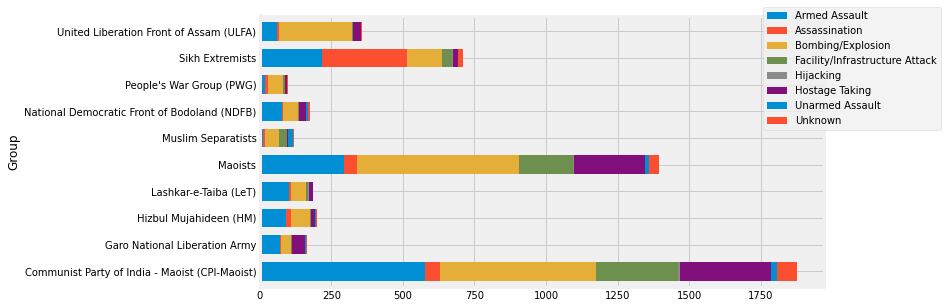

In [ ]:
#@title
v1=df_india[df_india['Group'].isin(df_india['Group'].value_counts()[1:11].index)]
pd.crosstab(v1['Group'],v1['AttackType']).plot.barh(stacked=True,figsize=(9,5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.05,1.05))



*   Sikh Extremists did assassinations far more than any other group.




**Weapons used by different groups**

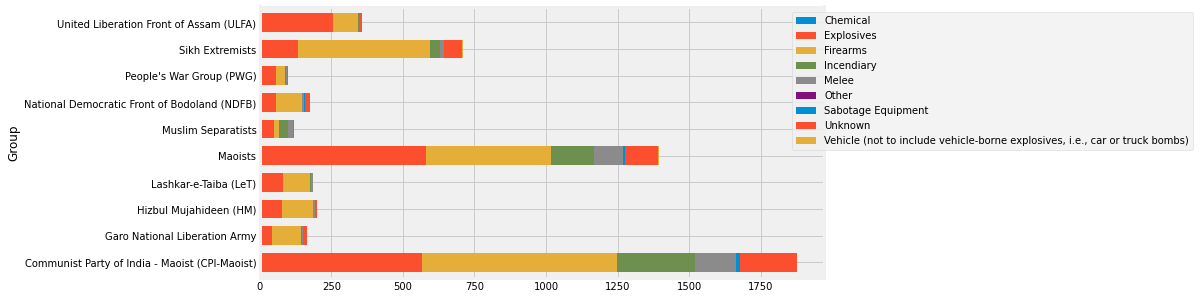

In [ ]:
#@title
pd.crosstab(v1['Group'],v1['WeaponType']).plot.barh(stacked=True,figsize=(9,5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.3,1))

**Conclusions**

⦁	Country with the most attacks: **Iraq**

⦁	City with the most attacks: **Baghdad**

⦁	Region with the most attacks: **Middle East & North Africa**

⦁	Year with the most attacks: **2014**

⦁	Group with the most attacks: **Taliban**

⦁	Most Attack Types: **Bombing/Explosion**
